In [1]:
import pandas as pd
from predict_protein import download_cptac, select_features, train_model
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor, VotingRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, ElasticNetCV

In [2]:
cptac_list = download_cptac.download_cptac(n_tumors=2)

cptac warning: transcriptomics data was not found for the following samples, so transcriptomics data columns were filled with NaN for these samples: C3L-00563.N, C3L-00605.N, C3L-00769.N, C3L-00770.N, C3L-00771.N, C3L-00930.N, C3L-00947.N, C3L-00963.N, C3L-01246.N, C3L-01249.N, C3L-01252.N, C3L-01256.N, C3L-01257.N, C3L-01744.N, C3N-00200.N, C3N-00729.N, C3N-01211.N, NX1.N, NX10.N, NX11.N, NX12.N, NX13.N, NX14.N, NX15.N, NX16.N, NX17.N, NX18.N, NX2.N, NX3.N, NX4.N, NX5.N, NX6.N, NX7.N, NX8.N, NX9.N (/Users/edwardlau/PythonProjects/CPTAC_Protein/predict_protein/download_cptac.py, line 37)
cptac warning: proteomics data was not found for the following samples, so proteomics data columns were filled with NaN for these samples: 01OV002, 01OV008, 01OV010, 01OV013, 01OV019, 01OV045, 01OV046, 01OV049, 02OV035, 02OV040, 02OV042, 02OV045, 04OV041, 11OV009, 13OV004, 17OV019, 17OV034, 22OV001, 26OV010 (/Users/edwardlau/PythonProjects/CPTAC_Protein/predict_protein/download_cptac.py, line 41)
cptac

In [3]:
tm = train_model.LearnCPTAC(pd.concat(cptac_list))
tm.train_method = 'forest'
tm.included_features = 'single'

In [4]:
# This worked in string earlier
protein_of_interest = 'A1BG'
res = tm.learn_one_protein(protein_to_do=protein_of_interest)
res

/Applications/venv/CPTAC_Protein/lib/python3.9/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


{'model': RandomForestRegressor(max_depth=3, n_estimators=1000, n_jobs=6, oob_score=True,
                       random_state=2),
 'metrics':       corr_train  corr_test  r2_train   r2_test  num_obs  num_features  \
 A1BG    0.478157   0.631744  0.188002  0.156009      180             1   
 
         nrmse  baseline_nrmse  
 A1BG  0.46631        0.526487  }

In [5]:
rf = res['model']

In [6]:
rf.oob_prediction_

array([ 0.14346185,  0.13091009,  0.13038383,  0.13433719,  0.11922001,
        0.53815665,  0.2543909 ,  0.13073867,  1.17199233,  0.11767705,
        1.0457664 ,  0.62606856,  0.13056487,  0.70312709,  0.8698642 ,
        0.45019765,  0.07835252,  0.69123312,  1.16610638, -0.06017267,
        0.51352188,  0.13835104,  0.8645727 ,  0.1335902 ,  0.60146106,
        0.5599601 ,  0.15892533,  0.7824408 ,  0.13623616,  0.1487002 ,
        1.51463036,  0.99718437,  0.11467616,  0.1636401 ,  0.89439121,
        0.61198301,  1.05819202,  0.65817241,  0.11794911,  0.63483033,
        0.78406607,  1.27066691,  0.70580173,  0.14107049,  0.59252343,
        0.75826755,  0.12726925,  0.90898289,  0.9507917 ,  0.38458691,
        0.55673229,  0.13202156,  0.11683882,  0.1383795 ,  0.8948864 ,
        1.18692367,  0.13631371,  0.90724332,  0.74850034,  0.67920215,
        0.11526099,  0.11420558,  1.38903576,  1.02099233,  0.59836454,
        0.93185667,  0.19798387,  0.15581531,  0.61246763,  0.31

In [7]:
x_train, x_test, y_train, y_test = tm.get_train_test(protein_to_do=protein_of_interest)

In [8]:
x_train
x_train['pred'] = rf.oob_prediction_
x_train


Name,A1BG_transcriptomics,pred
Patient_ID,,
OV01OV029,-0.022613,0.143462
OV17OV030,-0.022613,0.130910
OV01OV018,-0.022613,0.130384
BRX11BR036,-0.022613,0.134337
OV01OV023,-0.022613,0.119220
...,...,...
OV04OV045,-0.022613,0.125819
OV04OV001,-0.022613,0.134646
OV17OV033,-0.022613,0.134986


/var/folders/7c/l09scrbj6bdgsg118sgq25wm0000gn/T/ipykernel_87326/2687575015.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


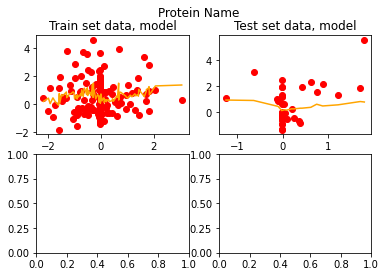

In [11]:
fig, axs = plt.subplots(2, 2)
fig.suptitle('Protein Name')



axs[0, 0].scatter(x_train[protein_of_interest + '_transcriptomics'], y_train, color = 'red')
# axs[0, 0].plot(x_train[protein_of_interest + '_transcriptomics'], rf.oob_prediction_, color = 'blue')
axs[0, 0].plot(x_train.sort_values(by=protein_of_interest + '_transcriptomics')[protein_of_interest + '_transcriptomics'],
               x_train.sort_values(by=protein_of_interest + '_transcriptomics')['pred'], color = 'orange')
axs[0, 0].title.set_text("Train set data, model")

axs[0, 1].scatter(x_test, y_test, color = 'red')
# axs[0, 1].plot(x_test, linreg_model.predict(x_test), color = 'blue')
axs[0, 1].plot(x_test.sort_values(by=protein_of_interest + '_transcriptomics'),
               rf.predict(x_test.sort_values(by=protein_of_interest + '_transcriptomics')), color = 'orange')
axs[0, 1].title.set_text("Test set data, model")

fig.show()
